In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os 
import glob
import astroalign as aa
from astropy.io import fits
from matplotlib.colors import LogNorm
import aplpy
from astroscrappy import detect_cosmics as lacosmic
# this is necessary because the version in CCDPROC is calling the wrong arguments. 

For more information about combining images with the FITS library see here: https://learn.astropy.org/FITS-images.html 

For more information about image alignment see the astro-align pages here: 
https://astroalign.readthedocs.io/en/latest/tutorial.html

This demo script aligns four images, stacks them, and outputs the stacked file. You need also the CCDproc library to remove cosmic rays. (Cosmic rays can cause problems for the alignements). Images must be pre-processed. 

The script will *not* work for very large offsets between the images. 


In [2]:
#data_directory = '/Users/hjmcc/teaching/m2/ohp/processed/'
data_directory='/Users/hjmcc/Dropbox/teaching/m1/tp-nocturne/2021/processed/'
output_dir = '/Users/hjmcc/Dropbox/teaching/m1/tp-nocturne/2021/processed/'


In [19]:
image_list = glob.glob(os.path.join(data_directory,'M_57*Green**pr.fits'))
# do with M57 (helix nebula) first 

In [20]:
image_list

['/Users/hjmcc/Dropbox/teaching/m1/tp-nocturne/2021/processed/M_57_Light_Green_30_secs_2021-11-29T19-25-29_005_pr.fits',
 '/Users/hjmcc/Dropbox/teaching/m1/tp-nocturne/2021/processed/M_57_Light_Green_30_secs_2021-11-29T20-02-04_007_pr.fits',
 '/Users/hjmcc/Dropbox/teaching/m1/tp-nocturne/2021/processed/M_57_Light_Green_30_secs_2021-11-29T19-24-24_003_pr.fits',
 '/Users/hjmcc/Dropbox/teaching/m1/tp-nocturne/2021/processed/M_57_Light_Green_30_secs_2021-11-29T20-05-49_014_pr.fits',
 '/Users/hjmcc/Dropbox/teaching/m1/tp-nocturne/2021/processed/M_57_Light_Green_30_secs_2021-11-29T20-04-13_011_pr.fits',
 '/Users/hjmcc/Dropbox/teaching/m1/tp-nocturne/2021/processed/M_57_Light_Green_30_secs_2021-11-29T19-26-01_006_pr.fits',
 '/Users/hjmcc/Dropbox/teaching/m1/tp-nocturne/2021/processed/M_57_Light_Green_30_secs_2021-11-29T19-23-50_002_pr.fits',
 '/Users/hjmcc/Dropbox/teaching/m1/tp-nocturne/2021/processed/M_57_Light_Green_30_secs_2021-11-29T20-04-45_012_pr.fits',
 '/Users/hjmcc/Dropbox/teaching/

Open the first extension of the first image  in the list with fitsio and use lacosmic to remove cosmic rays. 


'Target' image is reference image to which all the images are aligned. 

In [21]:
#M57 Red image (already processed) image is target 
target_image = os.path.join(data_directory,'M_57_Light_Red_30_secs_2021-11-29T19-06-03_012_pr.fits')
target=fits.open(target_image)[0].data
mask,target=lacosmic(target)

INFO: Auto-setting vmin to  4.467e+02 [aplpy.core]
INFO: Auto-setting vmax to  8.169e+02 [aplpy.core]


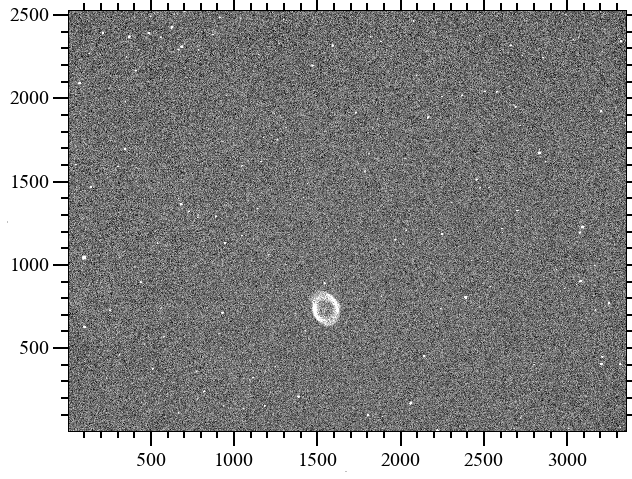

In [22]:
f = aplpy.FITSFigure(target)
f.show_grayscale()
plt.show()

In [23]:
image_concat = [target]
for image in image_list:
    print ("registering image ",image)
    source = fits.open(image)[0].data
    mask,source = lacosmic(source)
    registered_image, footprint = aa.register(source,target, detection_sigma=3)
    image_concat.append(registered_image)

registering image  /Users/hjmcc/Dropbox/teaching/m1/tp-nocturne/2021/processed/M_57_Light_Green_30_secs_2021-11-29T19-25-29_005_pr.fits
registering image  /Users/hjmcc/Dropbox/teaching/m1/tp-nocturne/2021/processed/M_57_Light_Green_30_secs_2021-11-29T20-02-04_007_pr.fits
registering image  /Users/hjmcc/Dropbox/teaching/m1/tp-nocturne/2021/processed/M_57_Light_Green_30_secs_2021-11-29T19-24-24_003_pr.fits
registering image  /Users/hjmcc/Dropbox/teaching/m1/tp-nocturne/2021/processed/M_57_Light_Green_30_secs_2021-11-29T20-05-49_014_pr.fits
registering image  /Users/hjmcc/Dropbox/teaching/m1/tp-nocturne/2021/processed/M_57_Light_Green_30_secs_2021-11-29T20-04-13_011_pr.fits
registering image  /Users/hjmcc/Dropbox/teaching/m1/tp-nocturne/2021/processed/M_57_Light_Green_30_secs_2021-11-29T19-26-01_006_pr.fits
registering image  /Users/hjmcc/Dropbox/teaching/m1/tp-nocturne/2021/processed/M_57_Light_Green_30_secs_2021-11-29T19-23-50_002_pr.fits
registering image  /Users/hjmcc/Dropbox/teaching

Go through the list of files, register them, and add them together. 

In [24]:
final_image = np.median(image_concat, axis=0)

Make a median of all the  images. 

INFO: Auto-setting vmin to  5.847e+02 [aplpy.core]
INFO: Auto-setting vmax to  8.270e+02 [aplpy.core]


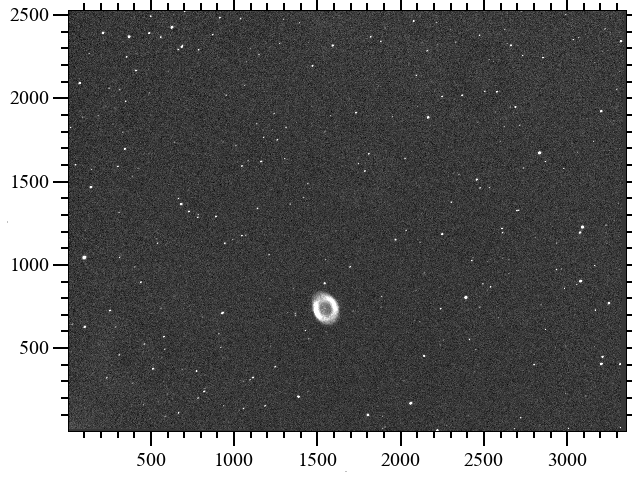

In [25]:
f = aplpy.FITSFigure(final_image)
f.show_grayscale()
plt.show()

*Note higher signal-to-noise (more faint stars) in combined image. 

In [27]:
outfile = os.path.join(output_dir,'final_M57_Green_2021.fits')
hdu = fits.PrimaryHDU(final_image)
hdu.writeto(outfile, overwrite=True)